In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [51]:
train = pd.read_csv(r'G:\machine learning\kaggle\Titanic\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
test = pd.read_csv(r'G:\machine learning\kaggle\Titanic\test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
titantic = pd.concat([train, test], sort = False)
titantic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [54]:
test.Fare = test.Fare.fillna(train.Fare.mean())

In [55]:
train.Cabin = train.Cabin.fillna('Unknown')
test.Cabin = test.Cabin.fillna('Unknown')

In [56]:
train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])
test.Embarked = test.Embarked.fillna(train.Embarked.mode()[0])

In [57]:
train['title'] = train.Name.apply(lambda x:x.split('.')[0].split(',')[1].strip())
test['title'] = test.Name.apply(lambda x:x.split('.')[0].split(',')[1].strip())
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Unknown,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C,Mrs


In [22]:
train.title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Capt              1
Lady              1
Ms                1
the Countess      1
Don               1
Jonkheer          1
Mme               1
Sir               1
Name: title, dtype: int64

In [23]:
test.title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: title, dtype: int64

In [58]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}
train.title = train.title.map(newtitles)
test.title = test.title.map(newtitles)

In [25]:
test.title.value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: title, dtype: int64

In [59]:
train.groupby(['title', 'Sex']).Age.mean()

title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

In [60]:
def newage(features):
    title = features[0]
    Sex = features[1]
    Age = features[2]
    if pd.isnull(Age):
        if title == 'Master' and Sex == 'male':
            return 4.57
        if title == 'Miss' and Sex == 'female':
            return 21.8
        if title == 'Mr' and Sex == 'male':
            return 32.37
        if title == 'Mrs' and Sex == 'female':
            return 35.72
        if title == 'Officer' and Sex == 'male':
            return 46.56
        if title == 'Officer' and Sex == 'female':
            return 49
        if title == 'Royalty' and Sex == 'male':
            return 42.33
        if title == 'Royalty' and Sex == 'female':
            return 40.5
    else:
        return Age
train.Age = train[['title', 'Sex', 'Age']].apply(newage, axis = 1)
test.Age = train[['title', 'Sex', 'Age']].apply(newage, axis = 1)

G:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
G:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
G:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
G:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


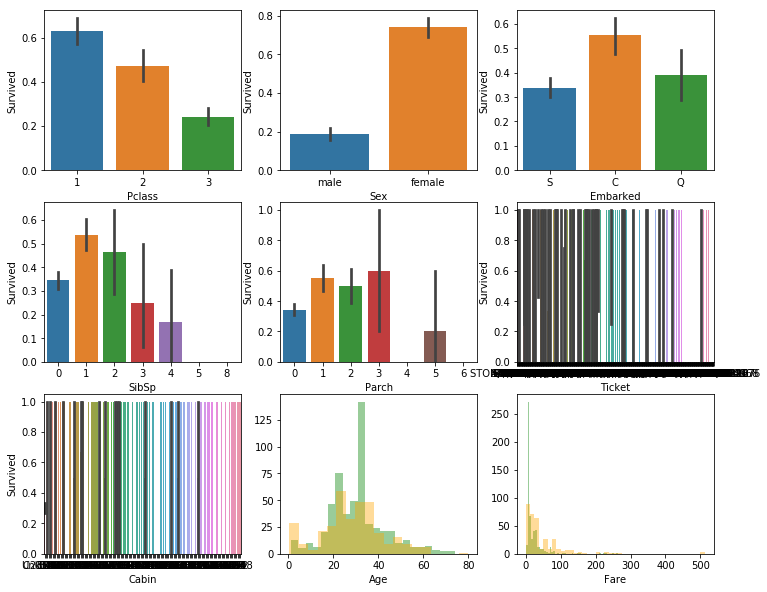

In [30]:
plt.figure(figsize=[12, 10])
plt.subplot(3,3,1)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(3,3,2)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(3,3,3)
sns.barplot('Embarked', 'Survived', data=train)
plt.subplot(3,3,4)
sns.barplot('SibSp', 'Survived', data=train)
plt.subplot(3,3,5)
sns.barplot('Parch', 'Survived', data=train)
plt.subplot(3,3,6)
sns.barplot('Ticket', 'Survived', data=train)
plt.subplot(3,3,7)
sns.barplot('Cabin', 'Survived', data=train)
plt.subplot(3,3,8)
sns.distplot(train[train['Survived']==0].Age, color='green', kde=False)
sns.distplot(train[train['Survived']==1].Age, color='orange', kde=False)
plt.subplot(3,3,9)
sns.distplot(train[train['Survived']==0].Fare, color='green', kde=False)
sns.distplot(train[train['Survived']==1].Fare, color='orange', kde=False)

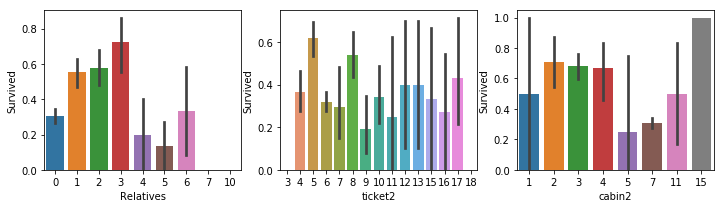

In [61]:
train['Relatives'] = train.SibSp + train.Parch
test['Relatives'] = test.SibSp + test.Parch
train['ticket2'] = train.Ticket.apply(lambda x:len(x))
test['ticket2'] = test.Ticket.apply(lambda x:len(x))
train['cabin2'] = train.Cabin.apply(lambda x:len(x))
test['cabin2'] = test.Cabin.apply(lambda x:len(x))
train['Name2']=train.Name.apply(lambda x: x.split(',')[0].strip())
test['Name2']=test.Name.apply(lambda x: x.split(',')[0].strip())
plt.figure(figsize=[12, 10])
plt.subplot(3, 3, 1)
sns.barplot('Relatives', 'Survived', data=train)
plt.subplot(3, 3, 2)
sns.barplot('ticket2', 'Survived', data=train)
plt.subplot(3, 3, 3)
sns.barplot('cabin2', 'Survived', data=train)

In [62]:
train.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Relatives,ticket2,cabin2,Name2
0,0,3,male,22.0,7.2500,S,Mr,1,9,7,Braund
1,1,1,female,38.0,71.2833,C,Mrs,1,8,3,Cumings
2,1,3,female,26.0,7.9250,S,Miss,0,16,7,Heikkinen
3,1,1,female,35.0,53.1000,S,Mrs,1,6,4,Futrelle
4,0,3,male,35.0,8.0500,S,Mr,0,6,7,Allen


In [33]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,title,Relatives,ticket2,cabin2
0,3,male,22.0,7.8292,Q,Mr,0,6,7
1,3,female,38.0,7.0000,S,Mrs,1,6,7
2,2,male,26.0,9.6875,Q,Mr,0,6,7
3,3,male,35.0,8.6625,S,Mr,0,6,7
4,3,female,35.0,12.2875,S,Mrs,2,7,7


In [63]:
len_train = len(train)
titanic = pd.concat([train, test], sort=False)
titanic = pd.get_dummies(titanic)
train = titanic[:len_train]
test = titanic[len_train:]

In [64]:
xtrain = train.drop('Survived', axis=1)
ytrain = train.Survived
xtest = test.drop('Survived', axis=1)

In [65]:
svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, xtrain.astype(float), ytrain,scoring='accuracy', cv=5)

In [66]:
scores_svm.mean()

0.8439879324218461

In [67]:
model = GSSVM.fit(xtrain, ytrain)
pred = model.predict(xtest)
test2 = pd.read_csv(r'G:\machine learning\kaggle\Titanic\test.csv')
output=pd.DataFrame({'PassengerId':test2['PassengerId'],'Survived':pred})
output.to_csv('G:\machine learning\kaggle\Titanic\submission.csv', index=False)